<a href="https://colab.research.google.com/github/CE0-MOEK/CE0-MOEK/blob/main/Q_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt
import pandas as pd
import io
dff = '/content/state_transitions.csv'

In [ ]:
rewards = np.zeros(16)
rewards[3]=10
rewards[2]=-1
rewards[11]=-1
rewards[10]=-1

terminal_state = 3
alpha = 0.01
epsilon = 0.4
Q_values = np.zeros((16,4))
score_log=[]

In [ ]:
plt.imshow(rewards.reshape(4,4))

In [ ]:
state_transistion_table = np.genfromtxt(dff, delimiter=",").astype(int)

In [34]:
def Q_update(next_Q_values, Q_values, actions, rewards, states):
  gamma = 0.9
  alpha = 0.02
  next_Q_values = next_Q_values
  new_Q_values = np.zeros((16,4)) + Q_values
  for i in reversed(range(len(rewards))):
    new_Q_values[states[i], actions[i]] = Q_values[states[i],actions[i]] + alpha * (rewards[i]+ gamma * next_Q_values-Q_values[states[i], actions[i]])
    next_Q_values = np.max(Q_values[states[i], :])
  return new_Q_values

In [35]:
def test_agent():
  state = 12
  done = False
  steps = 0
  total_rewards = 0
  states_log =  []
  while (not(state == terminal_state)) and steps<40:
    states_log.append(state)
    action = np.argmax(Q_values[state])
    state = state_transistion_table[state, action]
    total_rewards += rewards[state]
    steps +=1
  states_log.append(state)
  return total_rewards,states_log

In [36]:
for _ in range(300):
  state = 12
  state_log = []
  reward_log = []
  action_log = []

  done = False
  steps = 0

  while (not(state == terminal_state)) and steps<40:
    z = random.random()

    if z > epsilon:

      action = np.argmax(Q_values[state])
    else:
      action = random.randint(0,3)

    state_log.append(state)
    action_log.append(action)
    state = state_transistion_table[state, action]

    reward_log.append(rewards[state])

    steps +=1
  next_Q_values = np.max(Q_values[state])
  Q_values = Q_update(next_Q_values, Q_values, action_log, reward_log, state_log)

  score_log.append(test_agent()[0])

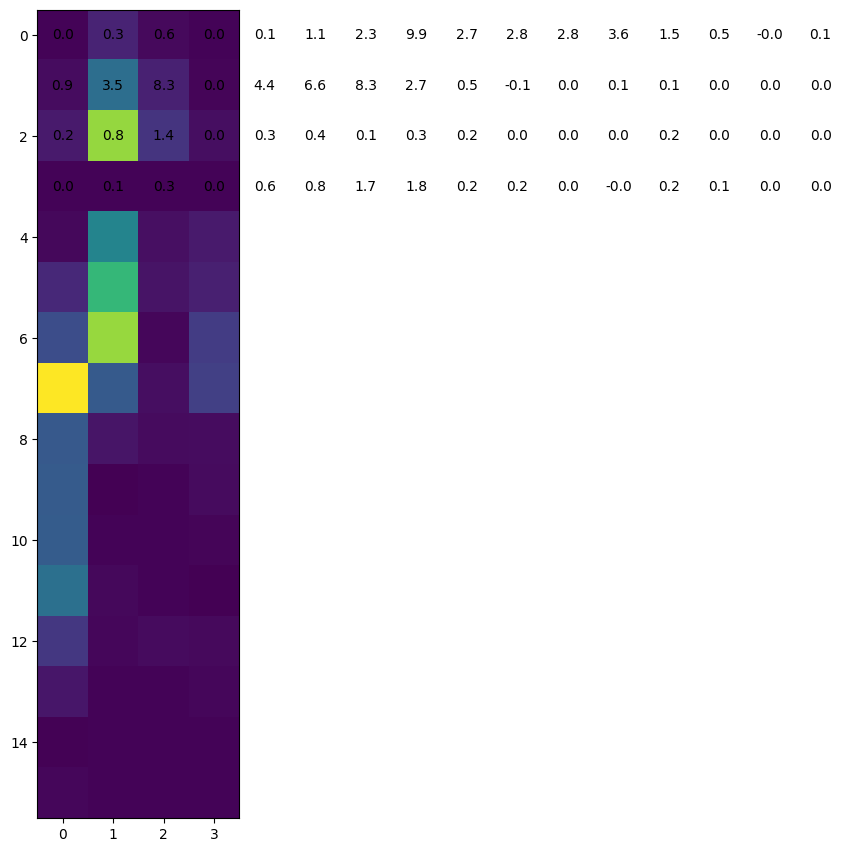

In [45]:
fig, ax1 = plt.subplots(1)
fig.set_size_inches(18.5, 10.5)
ax1.imshow(Q_values)

for (i,j), label in np.ndenumerate(Q_values.round(1)):
  ax1.text(i,j,label, ha='center', va='center')

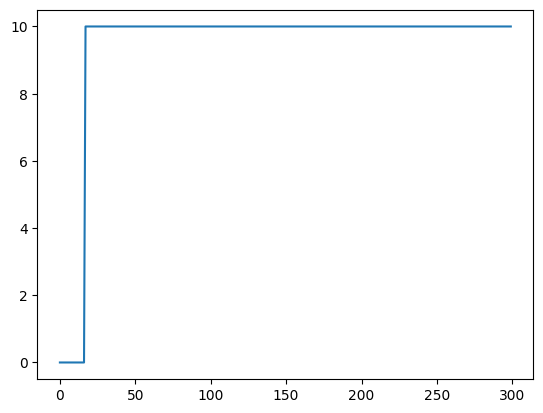

In [46]:
plt.plot(score_log)

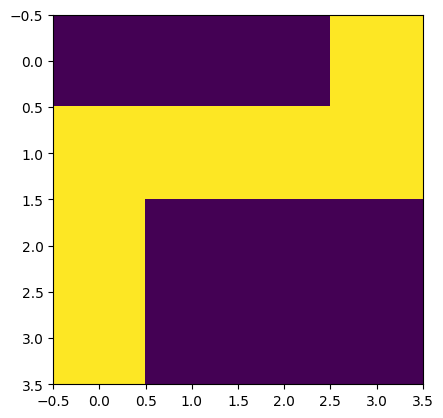

In [48]:
_, state_log = test_agent()
state_view =np.zeros(16)
state_view[state_log]=1
plt.imshow(state_view.reshape(4,4))